In [17]:
#  importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from IPython.display import display, Markdown


In [2]:
# load dataset
data = pd.read_csv(r"/content/wine.csv")
data


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Basic EDA
print("Shape of dataset:", data.shape)
print(data.head())


Shape of dataset: (178, 14)
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


<Figure size 1000x600 with 0 Axes>

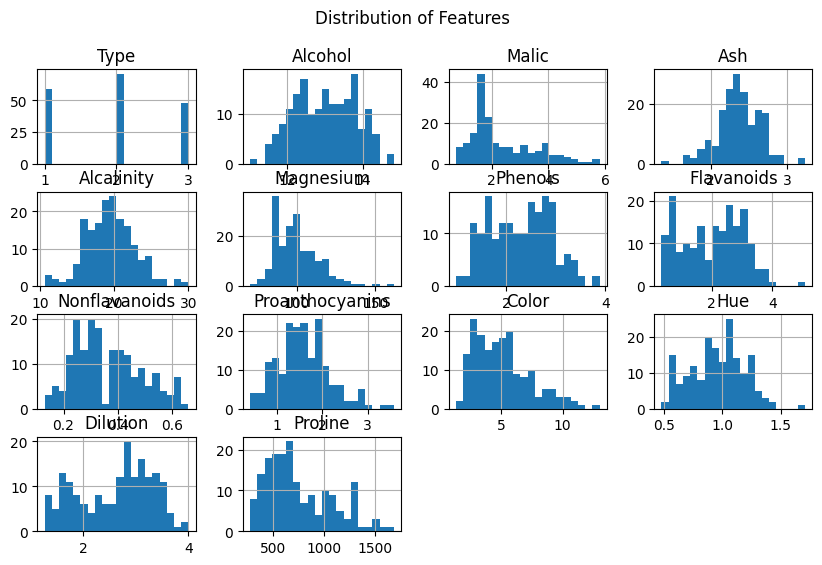

In [4]:
# Histograms for each feature
plt.figure(figsize=(10, 6))
data.hist(bins=20, figsize=(10, 6))
plt.suptitle("Distribution of Features")
plt.show()

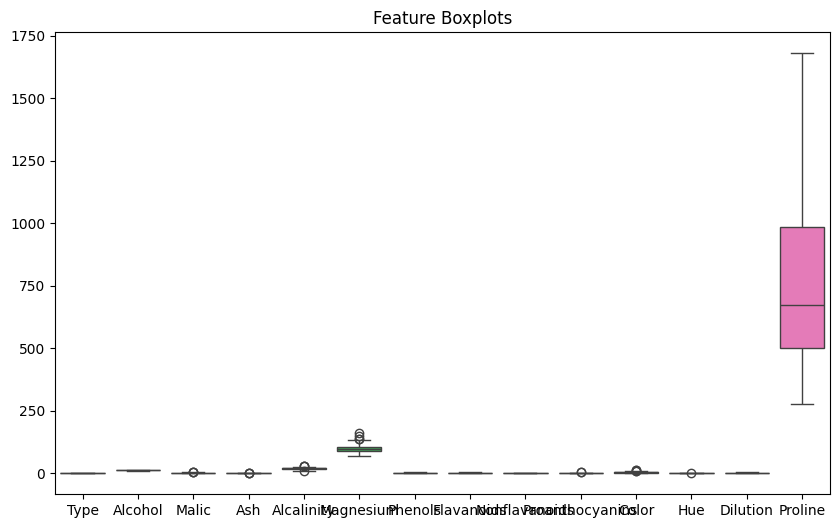

In [6]:
# Boxplots to spot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Feature Boxplots")
plt.show()

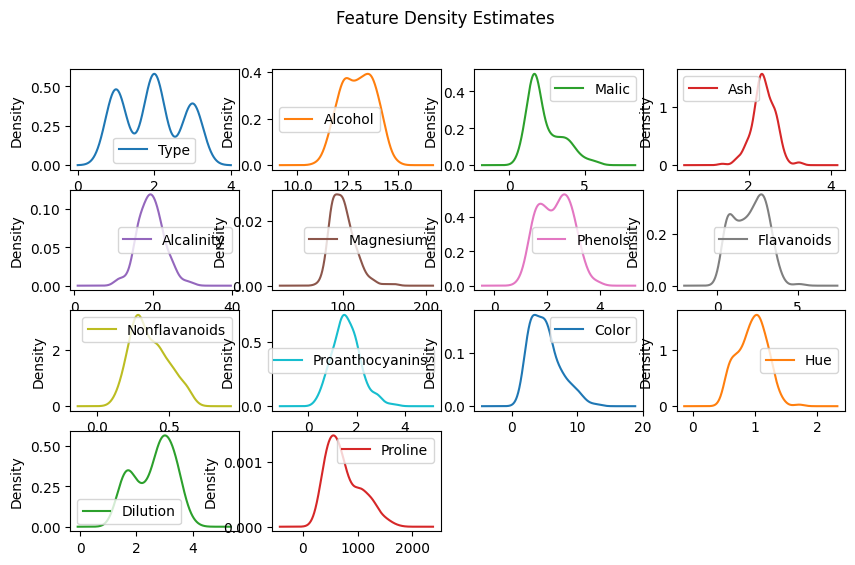

In [8]:
# Density plots
data.plot(kind="density", subplots=True, layout=(4,4), figsize=(10, 6), sharex=False)
plt.suptitle("Feature Density Estimates")
plt.show()


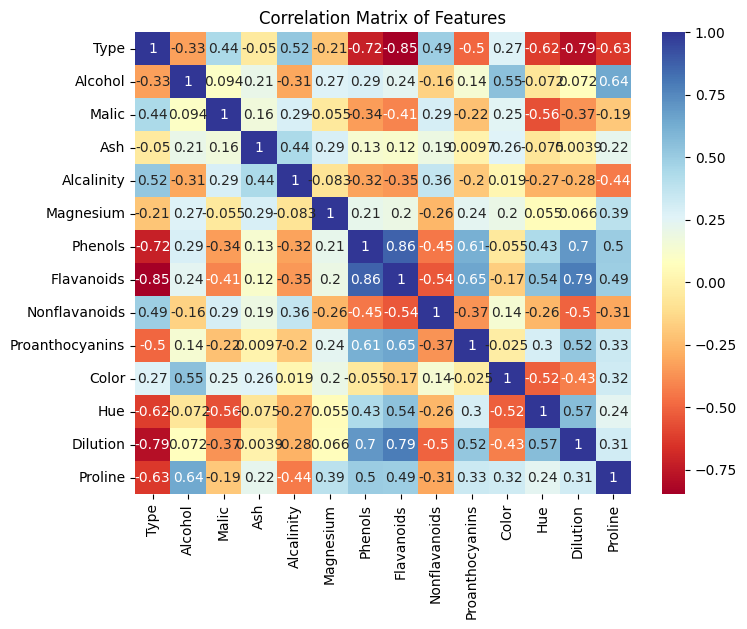

In [9]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix of Features")
plt.show()

In [10]:
# Task 2: PCA - scale first
scaler_obj = StandardScaler()
norm_data = scaler_obj.fit_transform(data)
norm_data


array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
# fit PCA on full set of components
pca_model = PCA()
pcs_all = pca_model.fit_transform(norm_data)
pcs_all

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

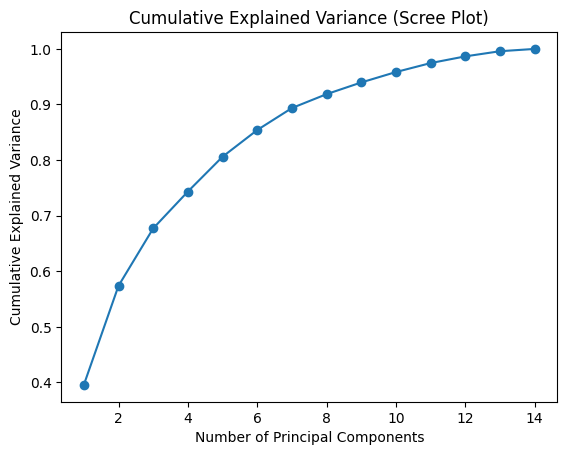

In [12]:
# cumulative explained variance (scree/cumulative plot)
cumulative_var = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (Scree Plot)")
plt.show()


In [13]:
# reduce to top 2 principal components for visualization
pca_vis = PCA(n_components=2)
pcs2 = pca_vis.fit_transform(norm_data)
pcs2

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

Clustering on original (scaled) data:
Silhouette Score -> 0.30773604383565206
Davies-Bouldin Index -> 1.3163957434114109


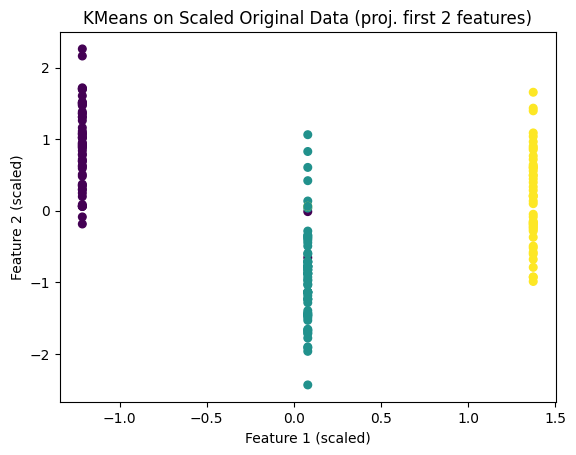

In [14]:
# Task 3: Clustering on the original (scaled) data
km_orig = KMeans(n_clusters=3, random_state=42, n_init=20)
lab_orig = km_orig.fit_predict(norm_data)
sil_score_orig = silhouette_score(norm_data, lab_orig)
dbi_orig = davies_bouldin_score(norm_data, lab_orig)

print("Clustering on original (scaled) data:")
print("Silhouette Score ->", sil_score_orig)
print("Davies-Bouldin Index ->", dbi_orig)

plt.scatter(norm_data[:, 0], norm_data[:, 1], c=lab_orig, cmap='viridis', s=30)
plt.title("KMeans on Scaled Original Data (proj. first 2 features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

Clustering on PCA-transformed data (2 PCs):
Silhouette Score -> 0.6024415520362845
Davies-Bouldin Index -> 0.5397078562575713


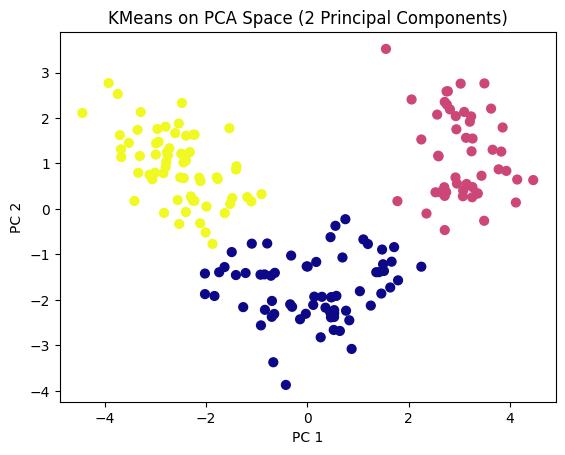

In [15]:
# Task 4: Clustering on PCA-reduced data (2 PCs)
km_pca = KMeans(n_clusters=3, random_state=42, n_init=20)
lab_pca = km_pca.fit_predict(pcs2)
sil_score_pca = silhouette_score(pcs2, lab_pca)
dbi_pca = davies_bouldin_score(pcs2, lab_pca)

print("Clustering on PCA-transformed data (2 PCs):")
print("Silhouette Score ->", sil_score_pca)
print("Davies-Bouldin Index ->", dbi_pca)

plt.scatter(pcs2[:, 0], pcs2[:, 1], c=lab_pca, cmap='plasma', s=40)
plt.title("KMeans on PCA Space (2 Principal Components)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [16]:
# Task 5: Compare clustering outcomes
print("Comparison summary:")
print("Original (scaled)  -> Silhouette:", sil_score_orig, ", Davies-Bouldin:", dbi_orig)
print("PCA (2 PCs)       -> Silhouette:", sil_score_pca, ", Davies-Bouldin:", dbi_pca)

if sil_score_pca > sil_score_orig:
    print("Observation: PCA-transformed data shows improved cluster separation (higher silhouette).")
else:
    print("Observation: Clustering on the original scaled features performed better by silhouette score.")


Comparison summary:
Original (scaled)  -> Silhouette: 0.30773604383565206 , Davies-Bouldin: 1.3163957434114109
PCA (2 PCs)       -> Silhouette: 0.6024415520362845 , Davies-Bouldin: 0.5397078562575713
Observation: PCA-transformed data shows improved cluster separation (higher silhouette).


In [18]:
display(Markdown("**Key Insights:**"))
display(Markdown("**1.** PCA is effective for reducing feature space and helps with visualization."))
display(Markdown("**2.** Clustering after PCA can produce better separation when features are correlated."))
display(Markdown("**3.** Trade-off: PCA may reduce direct interpretability since components are combinations of features."))
display(Markdown("**4.** Practical suggestion: Use PCA when dimensionality is high or features are strongly correlated; otherwise consider clustering on original features."))


**Key Insights:**

**1.** PCA is effective for reducing feature space and helps with visualization.

**2.** Clustering after PCA can produce better separation when features are correlated.

**3.** Trade-off: PCA may reduce direct interpretability since components are combinations of features.

**4.** Practical suggestion: Use PCA when dimensionality is high or features are strongly correlated; otherwise consider clustering on original features.